### 1.0 Import Dependecies:

In [1]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns

# Set custom preferences for displaying and visualizing data
# sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)

%matplotlib inline

### 2.0 Data Overview:

#### 2.1 Demographic/Transaction Dataset:

In [2]:
demographic_df = pd.read_csv('data/dunnhumby_df/hh_demographic.csv')
transaction_df = pd.read_csv('data/dunnhumby_df/transaction_data.csv')
demographic_df.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [3]:
transaction_df.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [4]:
print(demographic_df.info())
print('-' * 50)
print(transaction_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
AGE_DESC               801 non-null object
MARITAL_STATUS_CODE    801 non-null object
INCOME_DESC            801 non-null object
HOMEOWNER_DESC         801 non-null object
HH_COMP_DESC           801 non-null object
HOUSEHOLD_SIZE_DESC    801 non-null object
KID_CATEGORY_DESC      801 non-null object
household_key          801 non-null int64
dtypes: int64(1), object(7)
memory usage: 50.2+ KB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
household_key        int64
BASKET_ID            int64
DAY                  int64
PRODUCT_ID           int64
QUANTITY             int64
SALES_VALUE          float64
STORE_ID             int64
RETAIL_DISC          float64
TRANS_TIME           int64
WEEK_NO              int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
d

### 3.0 Data Pre-Processing:

#### 3.1 Titles to Lower Case:

In [5]:
# Changing columns names to lower case for uniformity:
demographic_df.columns = map(str.lower, demographic_df.columns)
transaction_df.columns = map(str.lower, transaction_df.columns)
print('Lowercase headers:', demographic_df.columns)
print('Lowercase headers:', transaction_df.columns)

Lowercase headers: Index(['age_desc', 'marital_status_code', 'income_desc', 'homeowner_desc',
       'hh_comp_desc', 'household_size_desc', 'kid_category_desc',
       'household_key'],
      dtype='object')
Lowercase headers: Index(['household_key', 'basket_id', 'day', 'product_id', 'quantity',
       'sales_value', 'store_id', 'retail_disc', 'trans_time', 'week_no',
       'coupon_disc', 'coupon_match_disc'],
      dtype='object')


#### 3.2 Null Values:

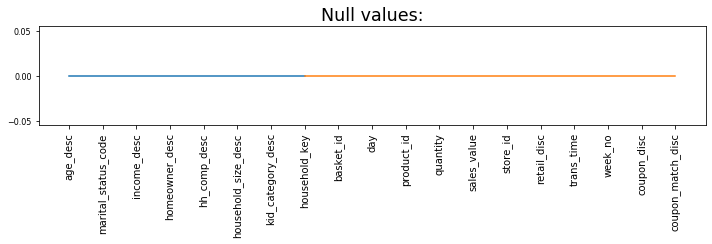

In [6]:
plt.figure(figsize=(10, 3.5))

_ = plt.plot(demographic_df.isna().sum())
_ = plt.plot(transaction_df.isna().sum())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(rotation=90)
_ = plt.yticks(size=8)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

#### 3.2.1 Handling $0 Sales Value & Quantity:

In [7]:
# Store the valid transactions in a new dataframe
non_zero = (transaction_df['sales_value'] != 0) & (transaction_df['quantity'] != 0)

transaction_df_clean = transaction_df[non_zero]

print('Number of transactions:', len(transaction_df_clean))
print('Difference:', len(transaction_df) - len(transaction_df_clean), 'Percentile:', ((len(transaction_df) - len(transaction_df_clean)) / len(transaction_df)) * 100)

Number of transactions: 2576815
Difference: 18917 Percentile: 0.7287732323675942


#### 3.3 Calculating True Price:

In [8]:
transaction_df_clean['customer_price'] = transaction_df_clean['sales_value'] + transaction_df_clean['coupon_disc']
transaction_df_clean.head()

//anaconda3/envs/Springboard/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,customer_price
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,1.39
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.99
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.50


#### 3.3.1 Handling Negative Values:

In [9]:
transaction_df_clean.loc[transaction_df_clean['customer_price'] < 0, 'customer_price'].head(10)

13895   -0.49
13898   -0.24
14469   -0.13
17385   -0.01
25640   -1.00
25642   -2.40
28195   -0.02
29460   -0.20
31812   -0.01
32186   -0.12
Name: customer_price, dtype: float64

In [11]:
# Changing negarive transactions to $0 since the discount that the customer recieved was greater than the sales value of the product and the store won't charge anything in these scenarios
transaction_df_clean.loc[transaction_df_clean['customer_price'] < 0, 'customer_price'] = 0
transaction_df_clean.loc[transaction_df_clean['customer_price'] == 0].head(10)

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,customer_price
2948,2327,27069676182,8,1044014,1,2.89,341,0.00,1546,2,-2.89,0.00,0.0
9931,679,27191270548,19,8160319,1,0.34,447,0.00,1122,3,-0.34,0.00,0.0
12816,410,27254962166,23,7441391,1,0.59,370,0.00,1644,4,-0.59,0.00,0.0
13895,988,27282152470,25,1088634,2,1.00,408,-0.98,2353,4,-1.49,0.00,0.0
13898,988,27282152470,25,1110867,2,1.51,408,-0.62,2353,4,-1.75,-0.25,0.0
14469,1317,27282446895,25,887912,1,1.87,359,-0.92,1643,4,-2.00,0.00,0.0
17385,988,27325685515,29,8204358,1,0.49,408,0.00,1125,5,-0.50,-0.50,0.0
17386,988,27325685515,29,8205815,1,0.99,408,0.00,1125,5,-0.99,0.00,0.0
17387,988,27325685515,29,9296848,1,0.35,408,-0.70,1125,5,-0.35,-0.34,0.0
20359,1300,27352270487,31,872342,1,5.99,346,-4.00,1204,5,-5.99,0.00,0.0


#### 3.4 Fixing Column Types:

In [12]:
demographic_df['income_desc'].value_counts()

50-74K       192
35-49K       172
75-99K        96
25-34K        77
15-24K        74
Under 15K     61
125-149K      38
100-124K      34
150-174K      30
250K+         11
175-199K      11
200-249K       5
Name: income_desc, dtype: int64

In [13]:
incomes_desc = ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']

demographic_df['income_desc'] = pd.Categorical(demographic_df['income_desc'], categories=incomes_desc, ordered=True)
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
age_desc               801 non-null object
marital_status_code    801 non-null object
income_desc            801 non-null category
homeowner_desc         801 non-null object
hh_comp_desc           801 non-null object
household_size_desc    801 non-null object
kid_category_desc      801 non-null object
household_key          801 non-null int64
dtypes: category(1), int64(1), object(6)
memory usage: 45.1+ KB


In [22]:
age_desc = ['19-24', '25-34', '35-44', '45-54', '55-64', '65+']

demographic_df['age_desc'] = pd.Categorical(demographic_df['age_desc'], categories=age_desc)
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
age_desc               801 non-null category
marital_status_code    801 non-null object
income_desc            801 non-null category
homeowner_desc         801 non-null object
hh_comp_desc           801 non-null object
household_size_desc    801 non-null object
kid_category_desc      801 non-null object
household_key          801 non-null int64
dtypes: category(2), int64(1), object(5)
memory usage: 39.8+ KB


In [32]:
demographic_df[['age_desc', 'marital_status_code', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']] = \
    demographic_df[['age_desc', 'marital_status_code', 'homeowner_desc', 'hh_comp_desc', 'household_size_desc', 'kid_category_desc']].astype('category')
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
age_desc               801 non-null category
marital_status_code    801 non-null category
income_desc            801 non-null category
homeowner_desc         801 non-null category
hh_comp_desc           801 non-null category
household_size_desc    801 non-null category
kid_category_desc      801 non-null category
household_key          801 non-null int64
dtypes: category(7), int64(1)
memory usage: 13.4 KB


#### 3.6 Joining Datasets:

In [33]:
df = transaction_df_clean.merge(demographic_df, on='household_key')
df.head()

,household_key,basket_id,day,product_id,quantity,sales_value,store_id,retail_disc,trans_time,week_no,coupon_disc,coupon_match_disc,customer_price,age_desc,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1520,1,0.0,0.0,2.19,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1520,1,0.0,0.0,2.99,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1520,1,0.0,0.0,3.09,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1520,1,0.0,0.0,2.50,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1520,1,0.0,0.0,0.60,65+,B,100-124K,Homeowner,Single Female,1,None/Unknown


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416672 entries, 0 to 1416671
Data columns (total 20 columns):
household_key          1416672 non-null int64
basket_id              1416672 non-null int64
day                    1416672 non-null int64
product_id             1416672 non-null int64
quantity               1416672 non-null int64
sales_value            1416672 non-null float64
store_id               1416672 non-null int64
retail_disc            1416672 non-null float64
trans_time             1416672 non-null int64
week_no                1416672 non-null int64
coupon_disc            1416672 non-null float64
coupon_match_disc      1416672 non-null float64
customer_price         1416672 non-null float64
age_desc               1416672 non-null category
marital_status_code    1416672 non-null category
income_desc            1416672 non-null category
homeowner_desc         1416672 non-null category
hh_comp_desc           1416672 non-null category
household_size_desc    1416672 non

#### 3.7 Grouping data by first household purchase:

In [37]:
households = len(df['household_key'].unique())
purchase_info = df[['product_id', 'store_id', 'household_key', 'basket_id', 'sales_value', 'day']]
purchase_summary = purchase_info.groupby(['day', 'household_key', 'store_id', 'basket_id', 'store_id', 'product_id']).sum().sort_values(by=['day']).reset_index(['household_key'])
purchase_summary.head(20)

household_key  sales_value
day store_id basket_id   store_id product_id                            
1   337      26984951769 337      878302                 98         0.90
    315      26985040735 315      868542               1060         3.68
                                  870929               1060         2.69
                                  873178               1060         1.98
                                  893729               1060         2.50
                                  897306               1060         1.67
                                  899682               1060         2.99
                                  904360               1060         0.99
                                  918086               1060         0.81
                                  924804               1060         1.19
                                  865528               1060         4.29
                                  929730               1060         2.59
                                  942708               1060         5.24
                                  945821               1060         2.78
                                  951590               1060         3.00
                                  964773               1060         4.38
                                  985427               1060         0.89
                                  992246               1060         1.25
                                  1011602              1060         0.99
                                  1019389              1060         1.89

In [38]:
purchase_summary.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1416672 entries, (1, 337, 26984951769, 337, 878302) to (711, 321, 42289737546, 321, 17937221)
Data columns (total 2 columns):
household_key    1416672 non-null int64
sales_value      1416672 non-null float64
dtypes: float64(1), int64(1)
memory usage: 42.1 MB


#### 3.8 Saving clean datasets:

In [40]:
df.to_csv('data/clean_demographic_transaction.csv', index=False)
purchase_summary.to_csv('data/df_first_purchase.csv', index=False)
print('Files Saved!')

Files Saved!
